In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("D:/DataSets/Predictive Analysis_ML/Iris dataset.csv")

# Data Understanding

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa


In [8]:
data.describe()                        

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 150 entries, 0 to 149

Data columns (total 6 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Id             150 non-null    int64  

 1   SepalLengthCm  150 non-null    float64

 2   SepalWidthCm   150 non-null    float64

 3   PetalLengthCm  150 non-null    float64

 4   PetalWidthCm   150 non-null    float64

 5   Species        150 non-null    object 

dtypes: float64(4), int64(1), object(1)

memory usage: 7.2+ KB


In [11]:
data.isnull().mean()*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [10]:
data.duplicated().sum()

0

# Data Cleaning 

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.drop(columns="Id", inplace=True)

In [30]:
data["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [26]:
data["Species"] = [i.split("-")[1] for i in data.iloc[:,-1]]

In [55]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [31]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,6.5,3.0,5.5,1.8,virginica
52,6.9,3.1,4.9,1.5,versicolor
115,6.4,3.2,5.3,2.3,virginica
108,6.7,2.5,5.8,1.8,virginica
23,5.1,3.3,1.7,0.5,setosa
57,4.9,2.4,3.3,1.0,versicolor
120,6.9,3.2,5.7,2.3,virginica
84,5.4,3.0,4.5,1.5,versicolor
37,4.9,3.1,1.5,0.1,setosa
75,6.6,3.0,4.4,1.4,versicolor


# Exploratory Data Analysis

In [32]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 150 entries, 0 to 149

Data columns (total 5 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   SepalLengthCm  150 non-null    float64

 1   SepalWidthCm   150 non-null    float64

 2   PetalLengthCm  150 non-null    float64

 3   PetalWidthCm   150 non-null    float64

 4   Species        150 non-null    object 

dtypes: float64(4), object(1)

memory usage: 6.0+ KB


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

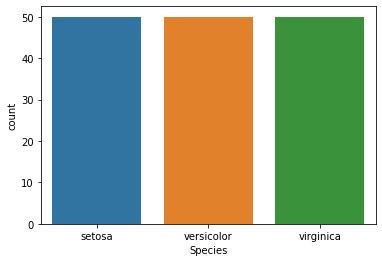

In [34]:
# Bar Plot
sns.countplot(data["Species"])

<AxesSubplot:ylabel='Species'>

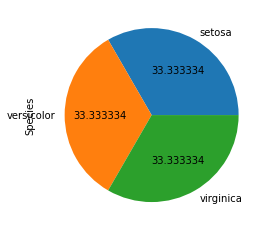

In [35]:
# Pie Chart

data["Species"].value_counts().plot(kind="pie", autopct="%2f")

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


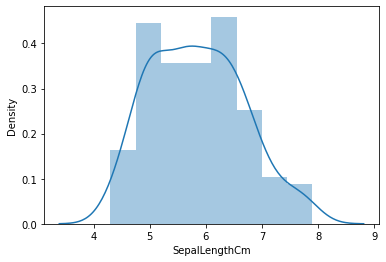

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


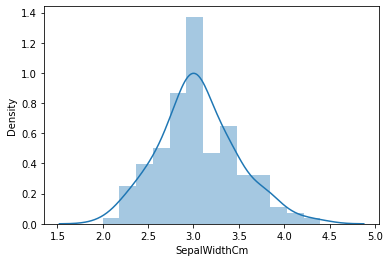

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


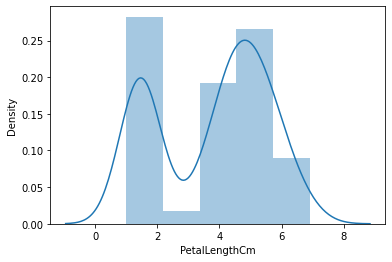

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


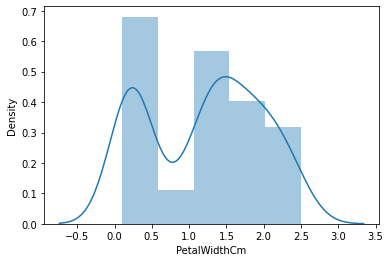

In [37]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


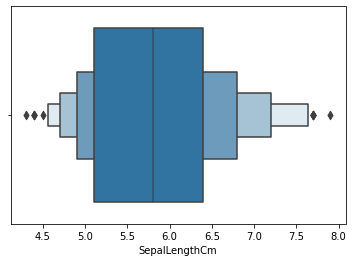

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


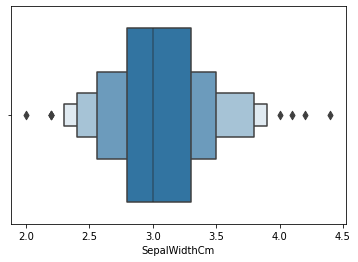

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


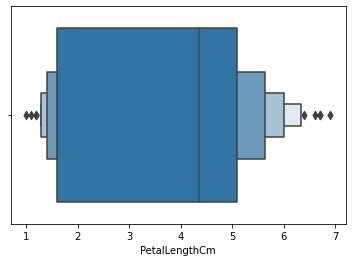

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


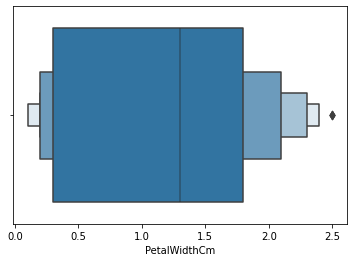

In [38]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [39]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Numeriacl - Numerical

ScatterPlot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

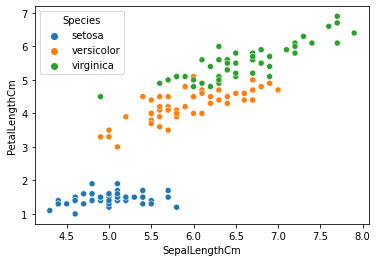

In [40]:
sns.scatterplot(data["SepalLengthCm"], data["PetalLengthCm"], hue = data["Species"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

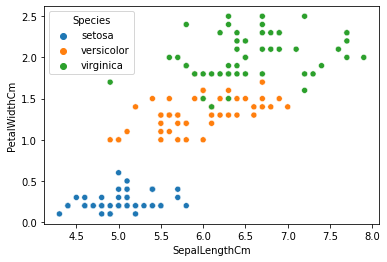

In [41]:
sns.scatterplot(data["SepalLengthCm"], data["PetalWidthCm"], hue = data["Species"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

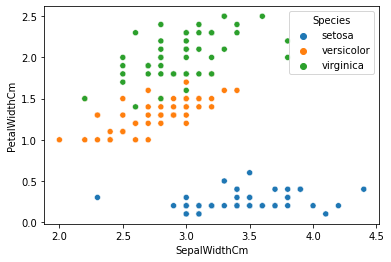

In [43]:
sns.scatterplot(data["SepalWidthCm"], data["PetalWidthCm"], hue = data["Species"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

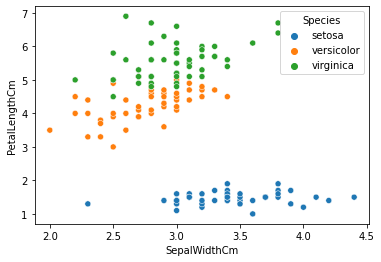

In [44]:
sns.scatterplot(data["SepalWidthCm"], data["PetalLengthCm"], hue = data["Species"])

Numericaal - Categorical

In [45]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


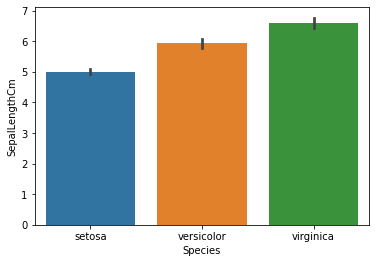

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


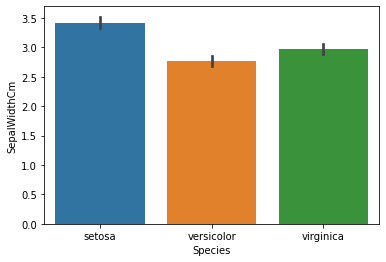

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


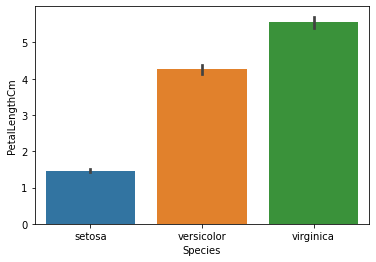

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


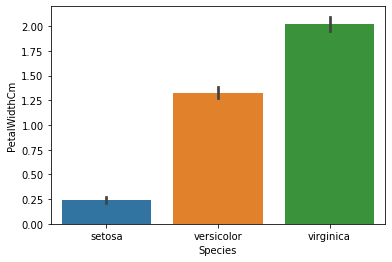

In [46]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["Species"], data[data.columns[i]]))

2. Box Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


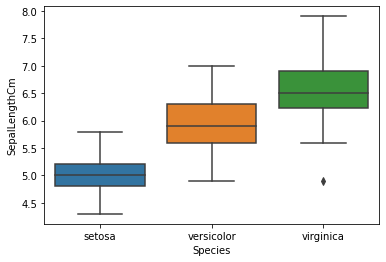

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


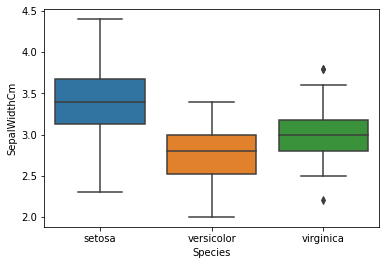

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


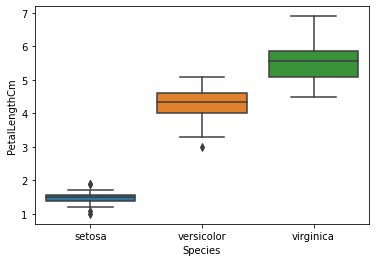

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


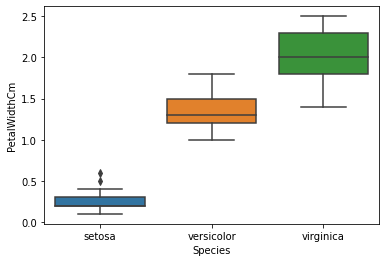

In [48]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["Species"], data[data.columns[i]]))

Multivariant Analysis

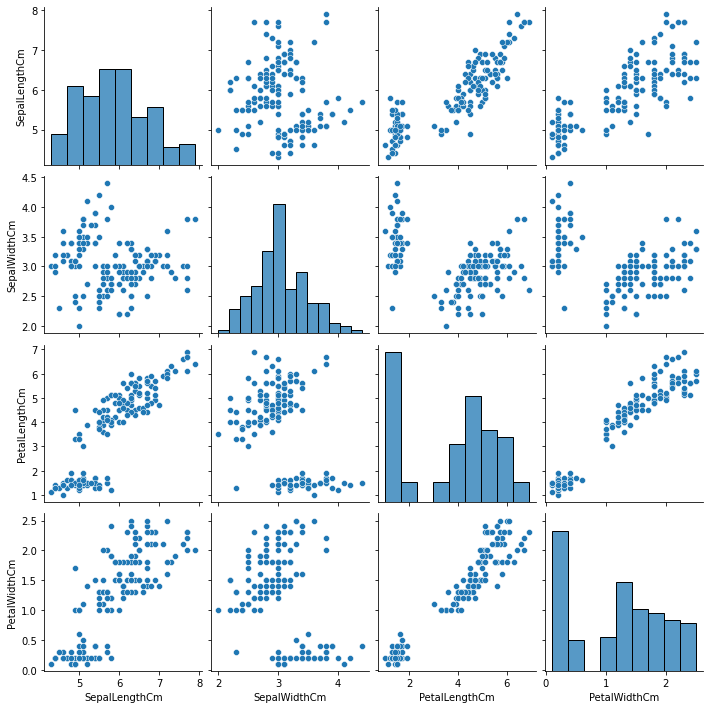

In [49]:
#sns.pairplot(train, hue ="species")
sns.pairplot(data)

In [50]:
data.shape

(150, 5)

# Feature Transformation

1. Outlier Detection

In [51]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


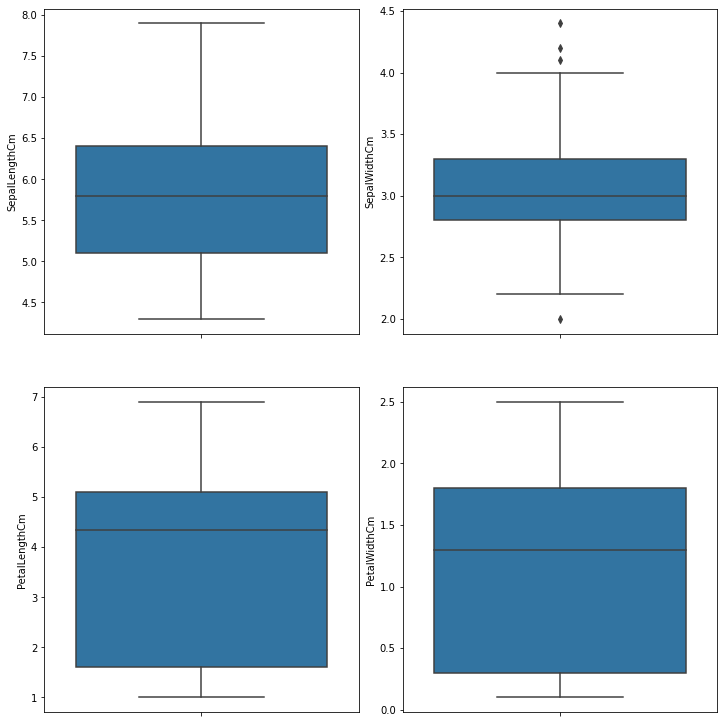

In [53]:
data1 = data.drop(columns=['Species'], axis=1)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [93]:
# data["SepalWidthCm"] = data[(data["SepalWidthCm"] < data["SepalWidthCm"].mean() + 3 * data["SepalWidthCm"].std()) & (data["SepalWidthCm"] > data["SepalWidthCm"].mean() - 3 * data["SepalWidthCm"].std())] 

2. Handling Categorical Features 
        or
3. Feature Scaling - Normalization

In [59]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])

In [60]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [61]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,6.2,2.8,4.8,1.8
23,5.1,3.3,1.7,0.5
64,5.6,2.9,3.6,1.3
117,7.7,3.8,6.7,2.2
84,5.4,3.0,4.5,1.5


In [62]:
x_train.shape

(120, 4)

# Model Building

**Logistic Regression**

In [64]:
logr = LogisticRegression()
model = logr.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

96.66666666666667

In [72]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

model1 = logr.fit(x_train,y_train)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


100.0

**Decision Tree Classifier**

In [74]:
dtc = DecisionTreeClassifier()
model = dtc.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

90.0

In [75]:
score = []
for i in range(500):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  0

100.0


In [76]:
dtc = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

model2 = dtc.fit(x_train,y_train)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

100.0

**RandomForest Classifier**

In [79]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
accuracy_score(y_test, pred)*100

100.0